# Sheet
Vergelijk de verschillen in de NBS per issue en per waarde van p

In [1]:
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import ipywidgets as widget
from IPython.core.display import display, HTML
%matplotlib inline

pd.set_option('display.max_rows', 750)
pd.set_option('display.max_columns', 500)
data_set_id = 1

In [2]:
conn = sqlite3.connect('C:\\Users\\jelme\\PycharmProjects\\decide-exchange-model\\data\\output\\decide-data_1.db')

In [3]:
df = pd.read_sql("""
SELECT
        a.name AS actor,
        i.name as issue,
        AVG(ai.position) as postion,
        AVG(ai.position) as postion,            
        i2.pointer                                AS iteration,
        m.p,
        m.id  
      FROM actorissue ai
        LEFT JOIN issue i ON ai.issue_id = i.id
        LEFT JOIN actor a ON ai.actor_id = a.id
        LEFT JOIN iteration i2 ON ai.iteration_id = i2.id
        LEFT JOIN repetition r ON i2.repetition_id = r.id
        LEFT JOIN modelrun m ON r.model_run_id = m.id
        LEFT JOIN dataset d ON a.data_set_id = d.id
      WHERE  ai.type = 'before' AND d.id = ?
     GROUP BY m.id, i2.pointer, a.id, i.id;
""", 
                 conn, 
                 params=(data_set_id,),
                 index_col=[ 'issue','actor','p'],                  
                 columns=['postion']
                )

table = pd.pivot_table(df, index=['issue','actor', 'iteration'], columns=['p'],values=['postion'])


# Posities 
Verloop van de positie over de verschillende onderhandelingsrondes van de actor per issue 

In [4]:
table

postion            
p                                                             0.0         0.8
issue       actor                           iteration                        
Commitments Alliance of Small Island States 0           90.000000   90.000000
                                            1           77.200000   77.200000
                                            2           66.448000   66.448000
                                            3           57.418331   57.430716
                                            4           50.100833   50.097712
                                            5           44.506610   45.351159
                                            6           39.072801   39.787531
                                            7           36.291361   38.323853
                                            8           32.244288   34.018184
                                            9           31.525157   33.861473
            Australia                       0           20.000000   20.000000
                                            1           43.800000   43.800000
                                            2           55.156000   55.156000
                                            3           55.156000   55.156000
                                            4           55.156000   55.156000
                                            5           55.156000   55.156000
                                            6           55.156000   55.156000
                                            7           55.156000   55.156000
                                            8           52.677186   47.656170
                                            9           50.851252   43.230136
            Brazil                          0           70.000000   70.000000
                                            1           47.200000   47.200000
                                            2           33.064000   33.064000
                                            3           45.749920   45.749920
                                            4           32.267083   32.262705
                                            5           23.907724   23.916403
                                            6           35.782069   35.787450
                                            7           26.192098   26.208042
                                            8           20.418020   20.584162
                                            9           31.062240   30.349017
            Canada                          0           10.000000   10.000000
                                            1           37.200000   37.200000
                                            2           50.800000   50.800000
                                            3           50.800000   50.800000
                                            4           50.800000   50.800000
                                            5           50.800000   50.800000
                                            6           47.377830   49.657676
                                            7           44.948221   47.761758
                                            8           33.590199   36.967068
                                            9           26.463047   29.003214
            China India                     0           85.000000   85.000000
                                            1           68.500000   68.500000
                                            2           55.630000   55.630000
                                            3           45.591400   45.591400
                                            4           37.820421   37.817887
                                            5           31.759058   31.763677
                                            6           27.092032   27.102934
                                            7           23.451752   23.467554
                                            8           22.001821   24.282834
  

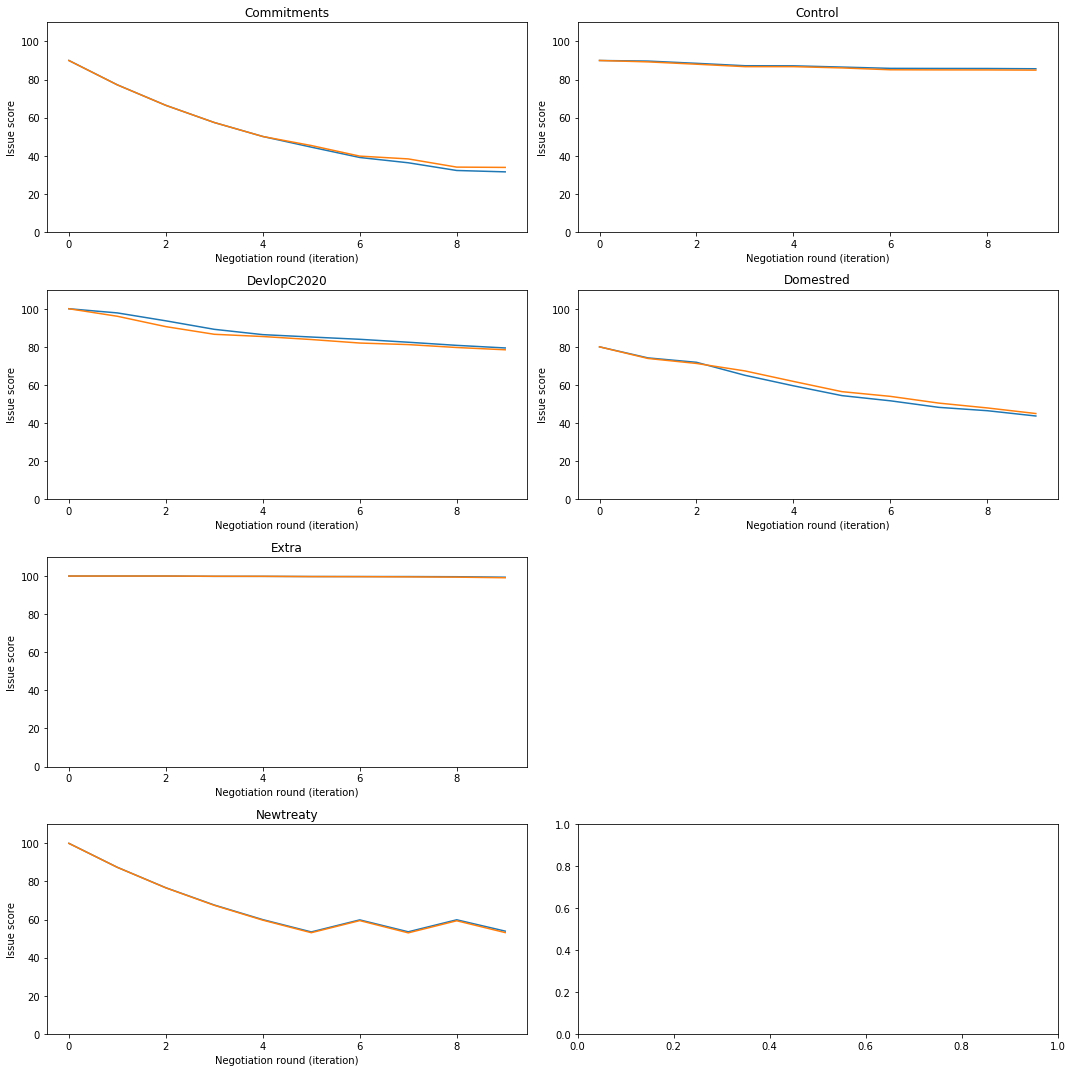

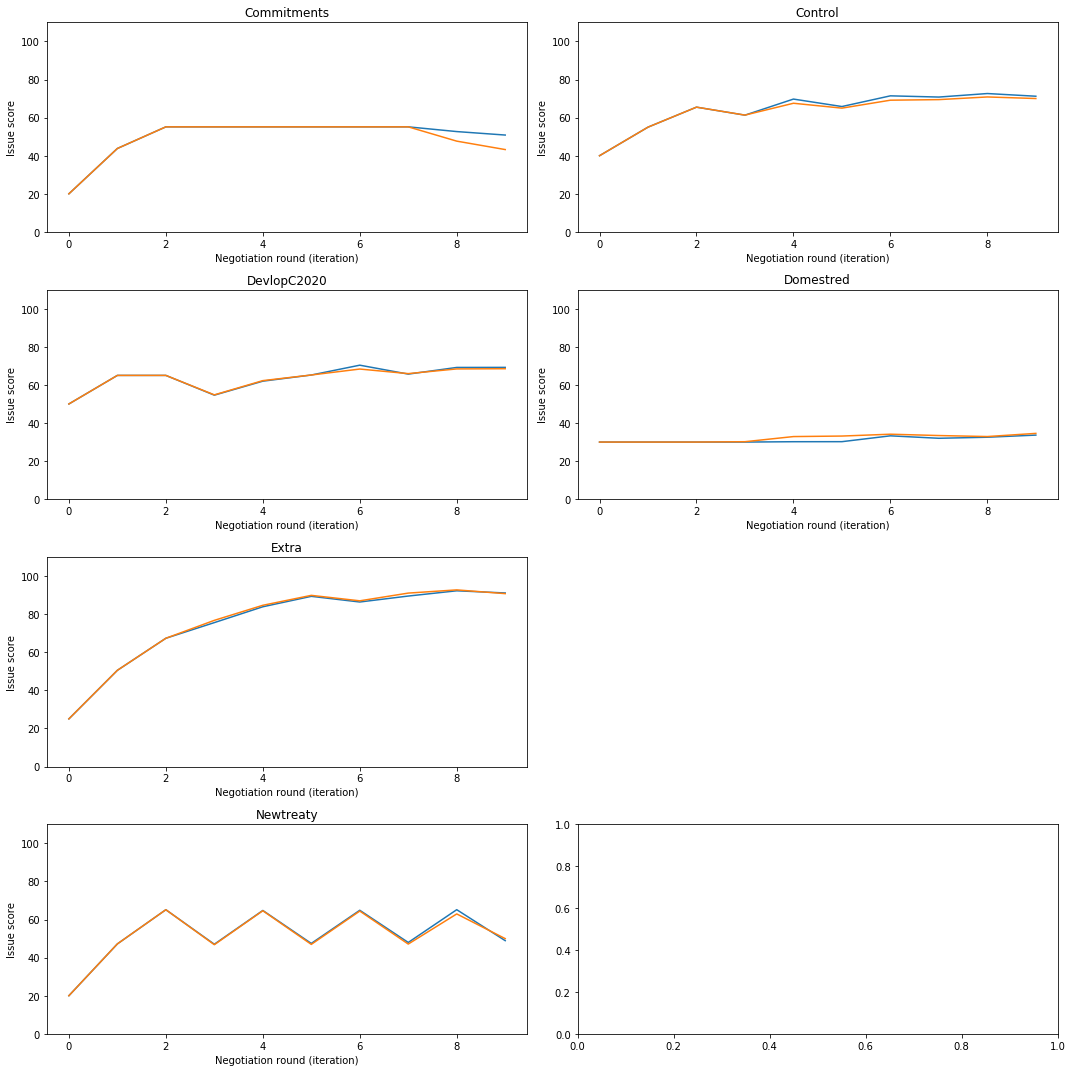

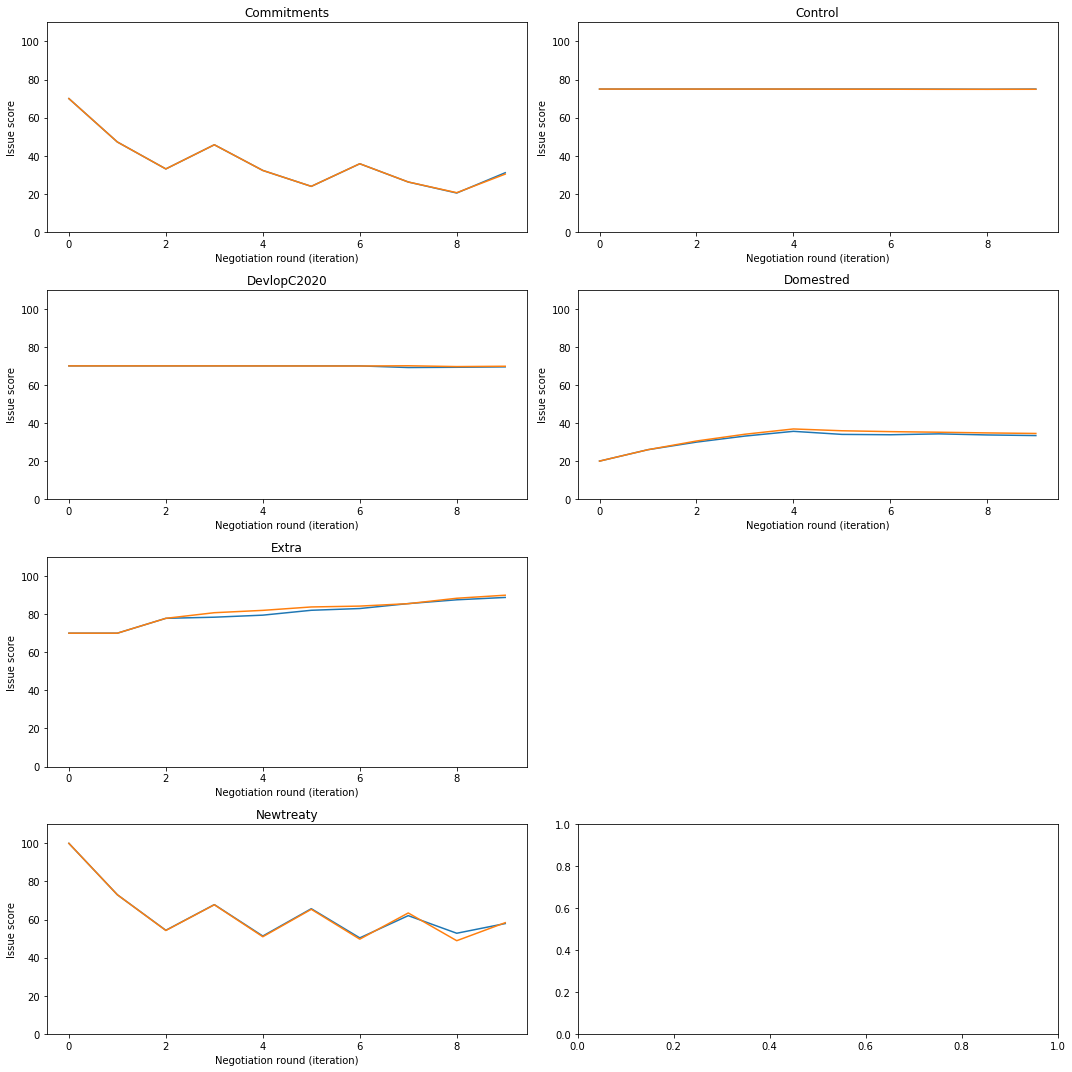

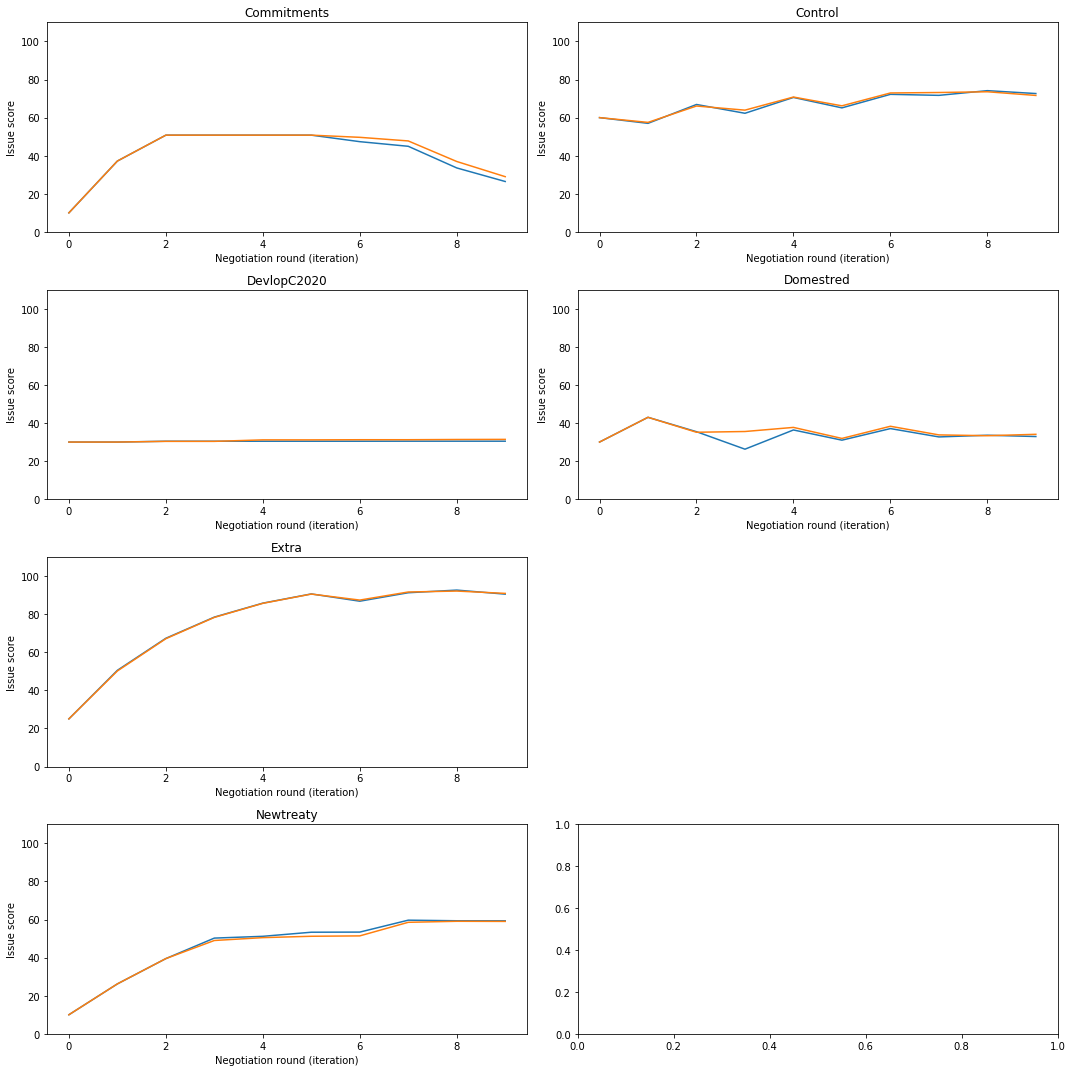

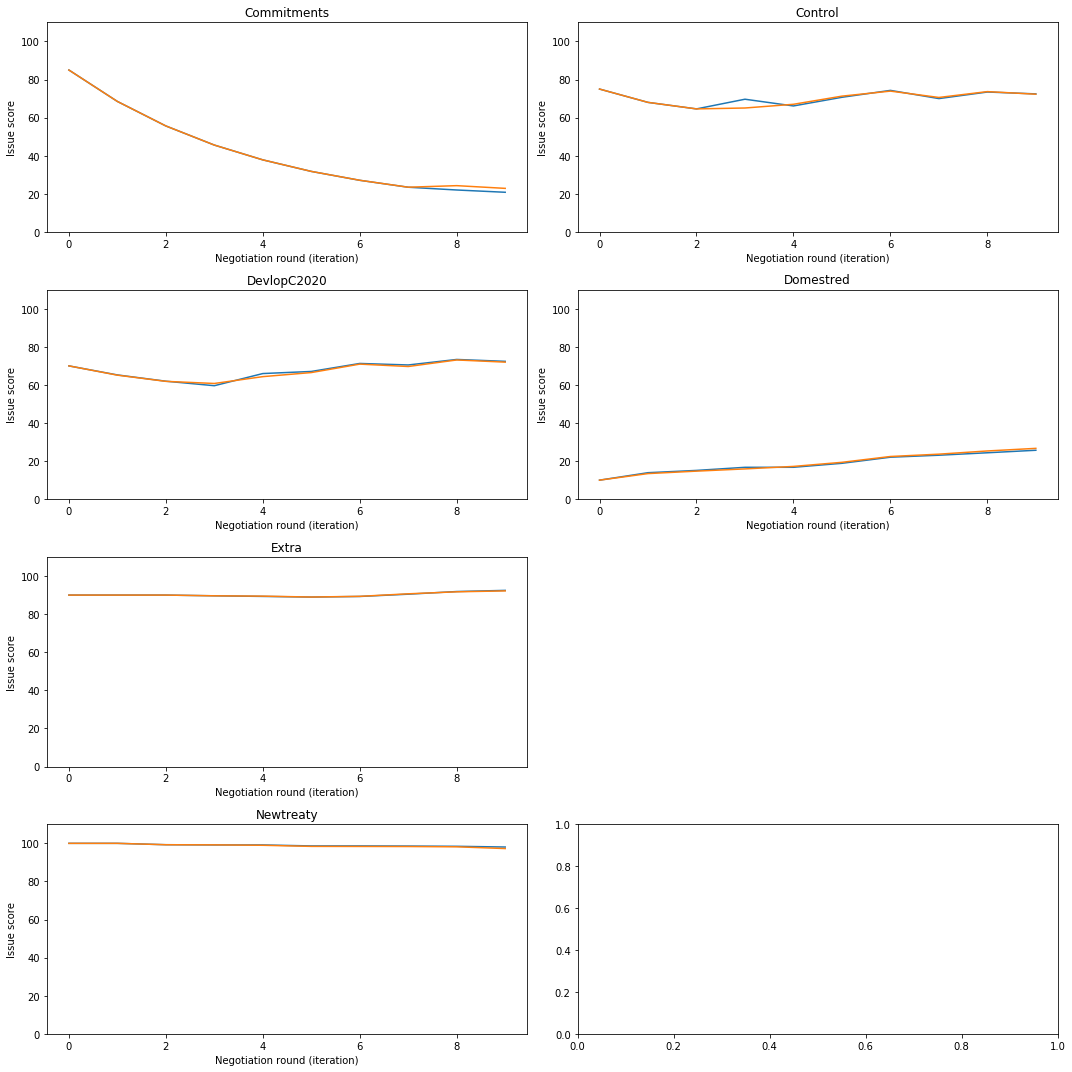

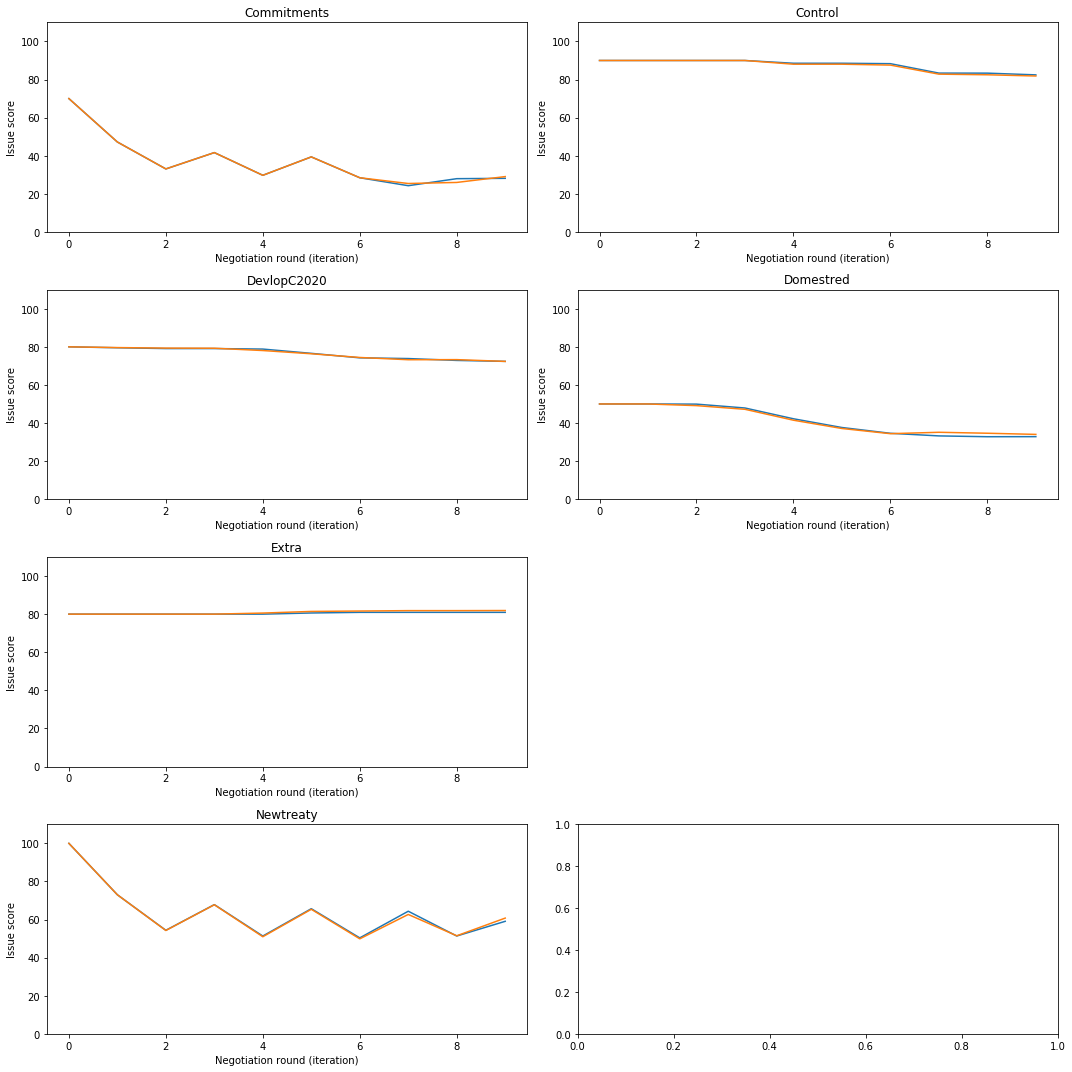

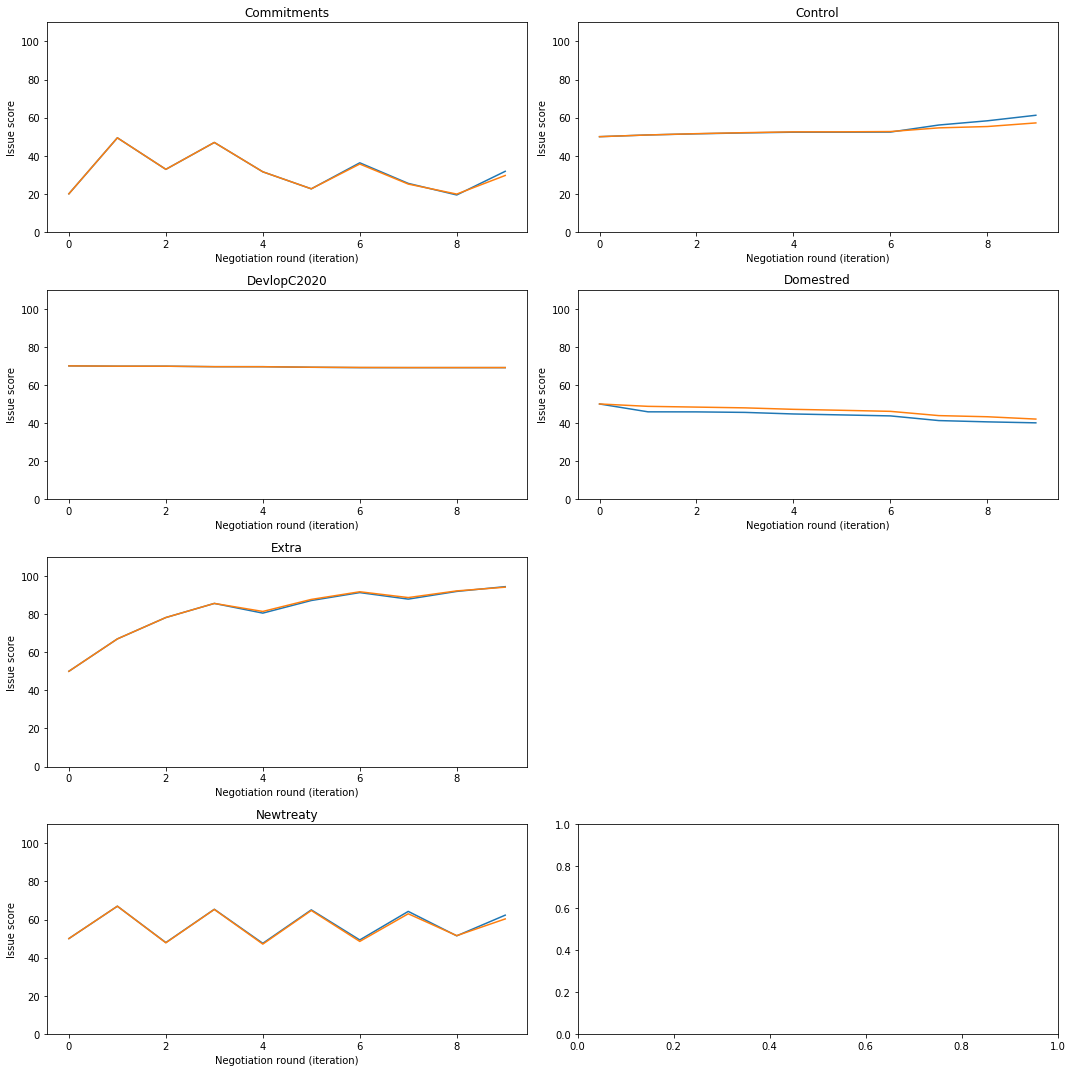

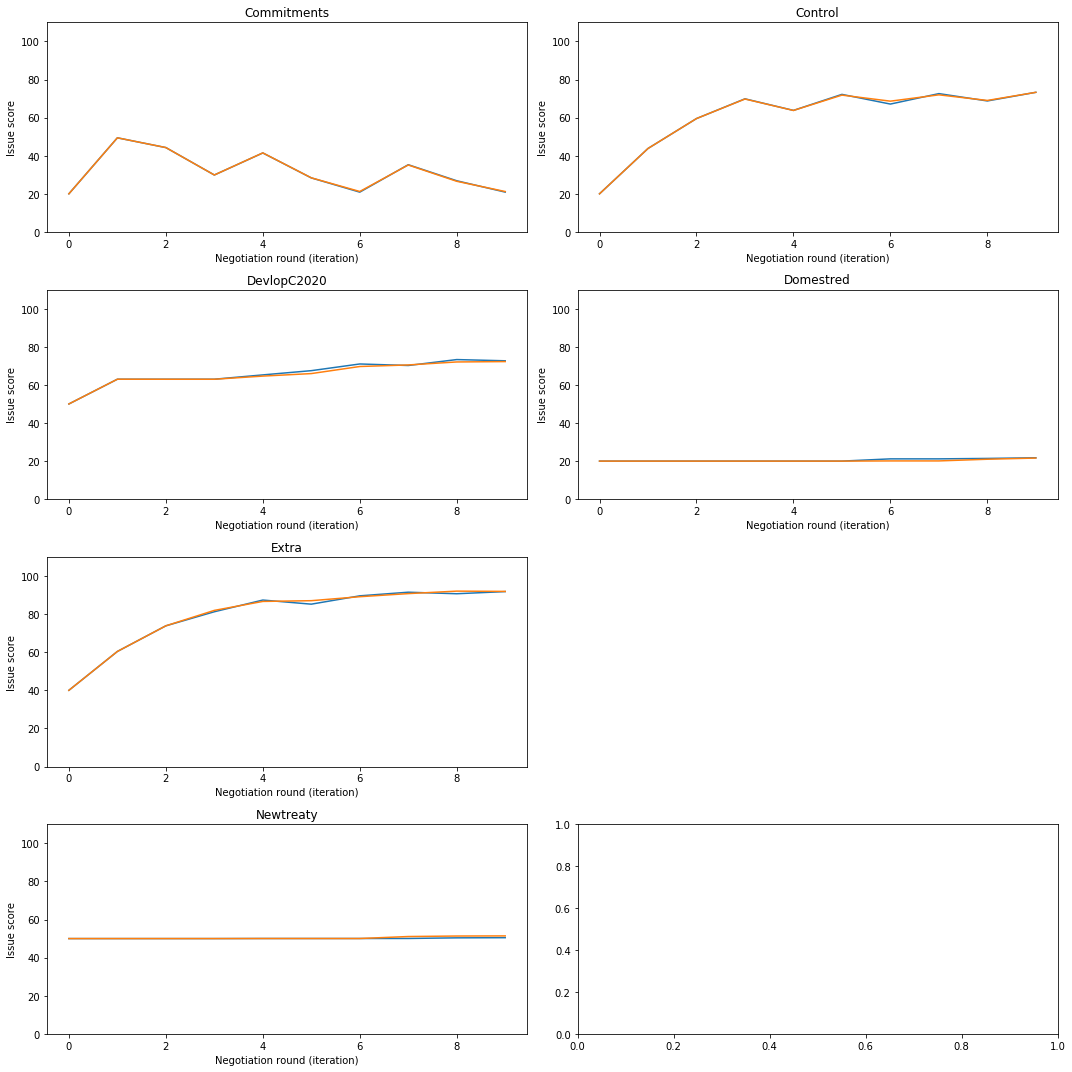

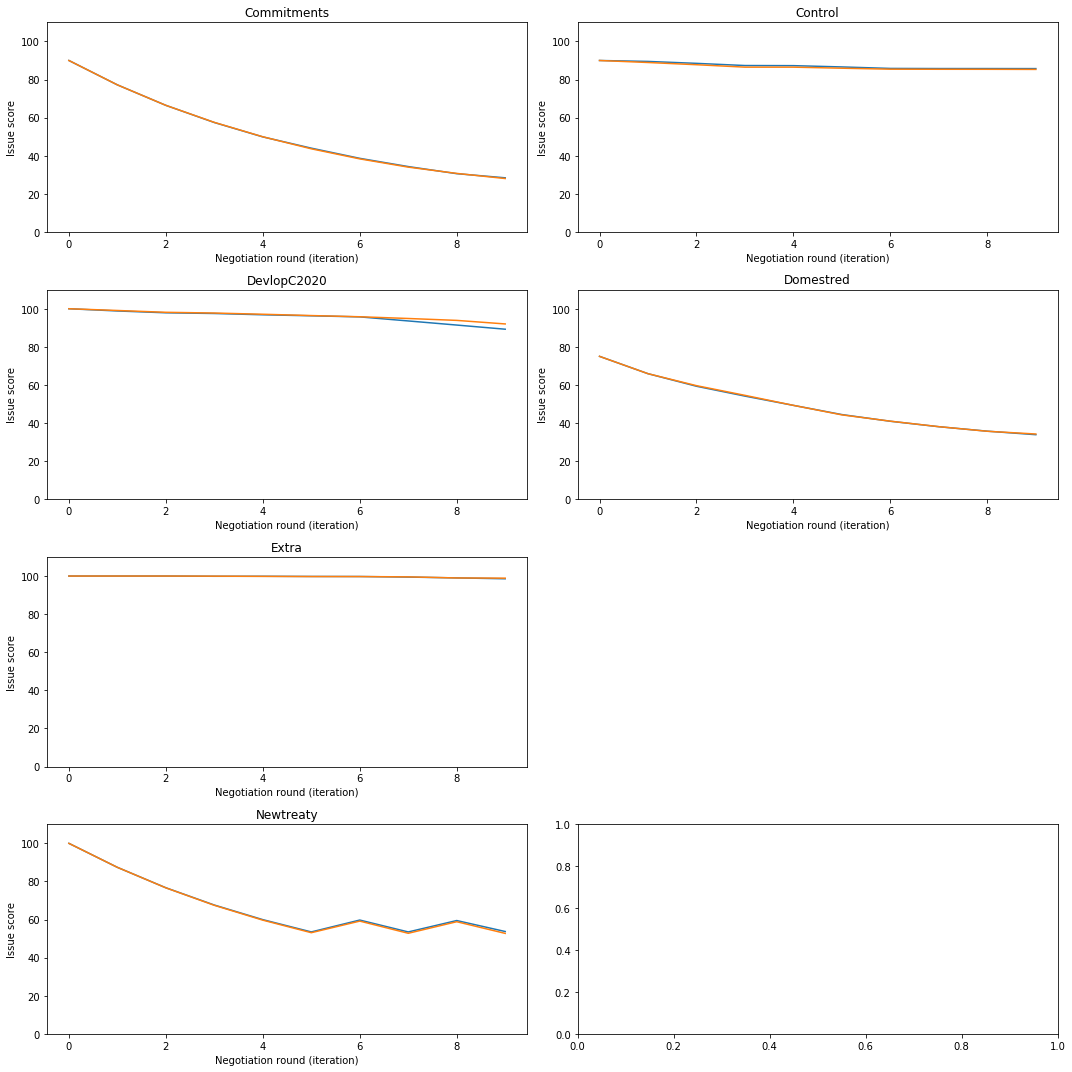

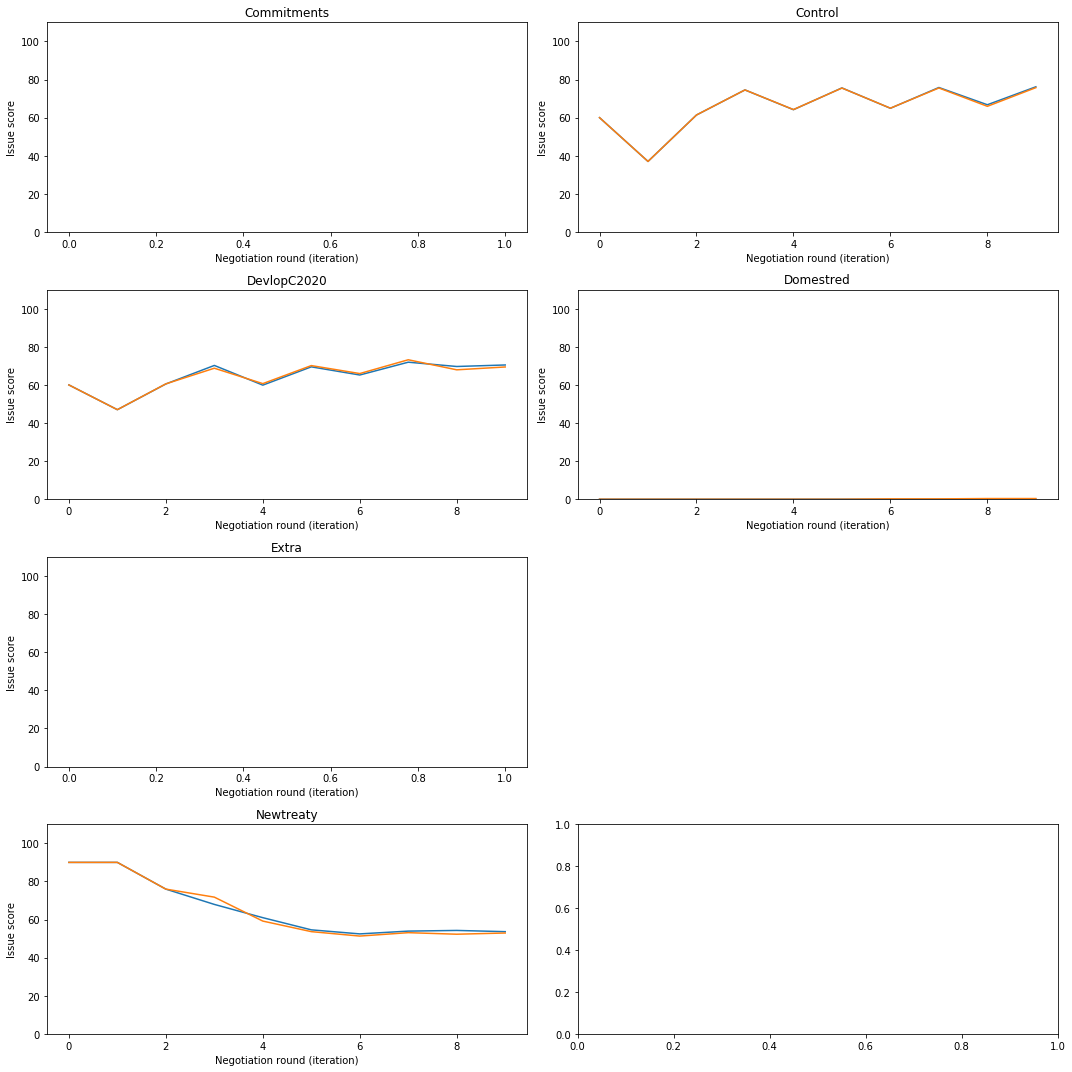

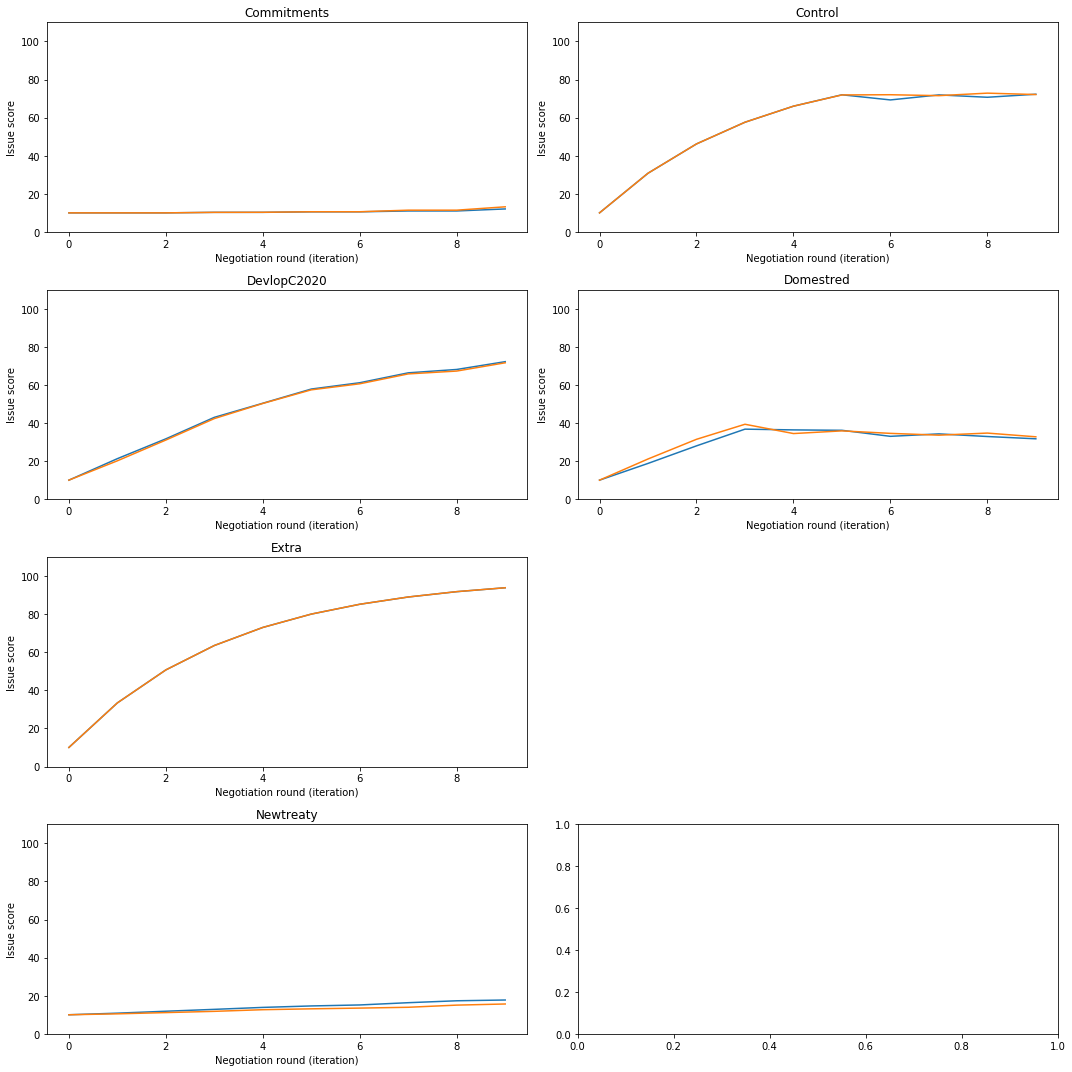

In [5]:
cursor = conn.execute('SELECT `name`, `id`, lower, upper FROM issue WHERE data_set_id = ? ORDER BY `name`', [data_set_id])
issues = cursor.fetchall()

cursor = conn.execute('SELECT `name`, `id` FROM actor WHERE data_set_id = ? ORDER BY `name`', [data_set_id])
actors = cursor.fetchall()

for actor, actor_id in actors:
    
    fig, axes = plt.subplots(ceil(len(issues) / 2), 2, figsize=(15,15))  # a figure with a 2x2 grid of Axes    
    i = 0
    fig.delaxes(axes[2,1])
    display(HTML('<hr><h1><center>{}</center></h1>'.format(actor)))
    for issue in issues:
        
        row = int(i / 2)
        col = i % 2
        
        subset = table.query('actor == ["{}"] and issue == ["{}"]'.format(actor, issue[0]))
        subchart = axes[row, col]
        subchart.plot(subset.values)
        subchart.set_ylim(0, 110)        
        subchart.set_title(issue[0])
        subchart.set_ylabel('Issue score')
        subchart.set_xlabel('Negotiation round (iteration)')
        
        i+=1
        
    
    plt.tight_layout()
    plt.show()
    